In [104]:
import pandas as pd 
#for the importing dataset
import numpy as np
%matplotlib inline 
#to plot the whatever graphic
import matplotlib.pyplot as plt #plot data
#import common libaries
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

0       14600
1       14800
2       14800
3       14800
4       14800
        ...  
1807     7860
1808     8410
1809     8960
1810     8920
1811     9050
Name: price, Length: 1812, dtype: int64

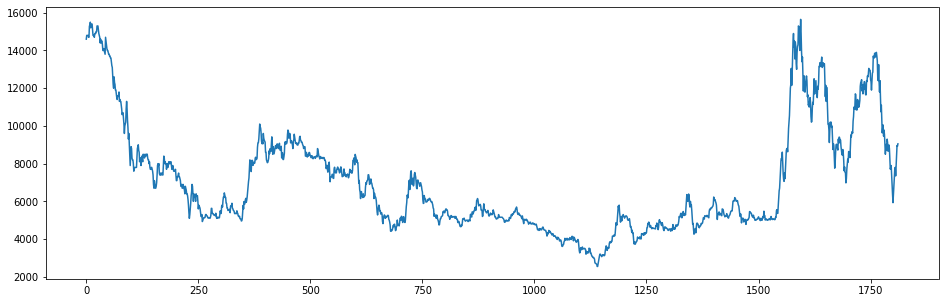

In [105]:
#import the dataset 
HAG=pd.read_csv(r"/content/HAGLdataset (4).csv")
# HPG.index = HPG['date']
# Convert the 'date' column to a datetime data type
HAG['date']=pd.to_datetime(HPG.date,format='%m/%d/%Y')
#set the date as the index
# HPG=HPG.set_index(pd.DatetimeIndex(HPG['date'].values))
HAG['Time'] = np.arange(len(HAG.index))
HAG['price'].plot(figsize=(16,5))
HAG['price']

,price,Open,High,Low,Time
count,1812.00000,1812.000000,1812.000000,1812.000000,1812.000000
mean,15288.53819,15294.660375,15508.131623,15089.505408,905.500000
std,10456.63874,10482.328760,10623.617303,10328.726382,523.223662
min,3280.00000,3187.400000,3293.200000,3161.000000,0.000000
25%,7739.47500,7728.450000,7808.575000,7660.925000,452.750000
50%,11578.70000,11605.100000,11727.400000,11435.350000,905.500000
75%,20906.90000,20704.500000,21422.550000,20470.600000,1358.250000
max,43895.80000,43895.800000,44198.500000,43517.400000,1811.000000


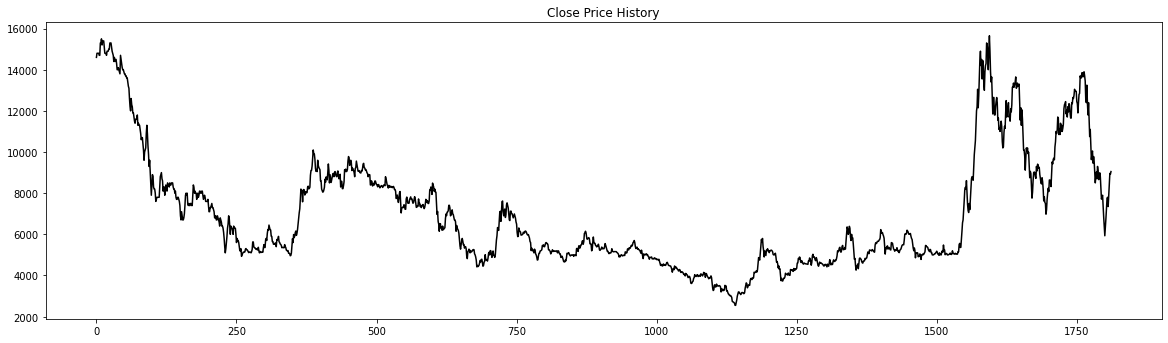

In [111]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Close Price History')
#the figure has 2 row, 1 columns, and this plot is the first plot. 
HAG['price'].plot(style="k")
# plt.subplot(2, 1, 2)
# #the figure has 2 row, 1 columns, and this plot is the second plot. 
# POW['Vol'].plot(style="k")
# plt.title('Volume History')
HAG.describe()

Kiem dinh ADF coi thu chuoi co nghiem don vi hay khong va tinh dung





In [113]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(HAG['price'].dropna() )
print('ADF Statistic: {} '.format(result[0]))
print('p-value: {} '.format(result[1]))
print('Critical value : {} ')
for key,value in result[4].items():
            print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

ADF Statistic: -3.3663943638018137 
p-value: 0.012159244536145706 
Critical value : {} 
	1%: -3.4339921916016345
	5%: -2.8631488249300574
	10%: -2.5676264862577503
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


The output above shows that the p-value is greater than the significance level of 0.05, so we fail to reject the null hypothesis. The series is not stationary and requires differencing.

In [114]:
from statsmodels.tsa.statespace.tools import diff
result = adfuller(HAG['price'].diff().dropna() )
print('ADF Statistic: {} '.format(result[0]))
print('p-value: {} '.format(result[1]))
print('Critical value : {} ')
for key,value in result[4].items():
            print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

ADF Statistic: -9.953630667442274 
p-value: 2.477032638105299e-17 
Critical value : {} 
	1%: -3.4339921916016345
	5%: -2.8631488249300574
	10%: -2.5676264862577503
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [115]:
! pip install pmdarima
import warnings 
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
import pmdarima as pm

In [116]:
model  = pm.auto_arima(HAG['price'],
                      test='adf',       # use adftest to find optimal 'd' # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)     # set to stepwise
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24952.820, Time=1.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24981.245, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24969.200, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24967.358, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24979.543, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=24966.854, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24966.062, Time=0.87 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=24955.340, Time=3.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=24953.942, Time=6.94 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24966.246, Time=1.76 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=24958.289, Time=5.38 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=24955.156, Time=5.57 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=24951.089, Time=6.89 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=24948.370, Time=6.74 sec
 ARIMA(4,1,2)(0,0,0

In the above output, the lowest AIC value of Best model:  ARIMA(4,1,0), and that is used as the final estimator.

> Indented block





In [122]:
# Split the 'df1' DataFrame into train and test datasets
# Convert the 'df1' DataFrame to a NumPy array
data = HAG.values
# Calculate the number of rows to use for the train dataset
# Set 30% for testing
t = .8
t = int(t * len(HAG))

# Set 20% for testing
train = HAG[:t]
test = HAG[t:]

In [123]:
result = adfuller(train['price'].diff().dropna())
print('ADF Statistic: {} '.format(result[0]))
print('p-value: {} '.format(result[1]))
print('Critical value : {} ')
for key,value in result[4].items():
            print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

ADF Statistic: -17.76170943794788 
p-value: 3.336290745029882e-30 
Critical value : {} 
	1%: -3.434886677803751
	5%: -2.8635436366589673
	10%: -2.5678367211155533
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [124]:
#ignore the harmless Warning
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


In [126]:
model_2 = sm.tsa.arima.ARIMA(train['price'],order=(5,1,3))
# results = model.fit(disp=-1)
# results.summary()
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 1449
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -9512.172
Date:                Tue, 03 Jan 2023   AIC                          19042.344
Time:                        08:00:19   BIC                          19089.845
Sample:                             0   HQIC                         19060.071
                               - 1449                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2716      0.305      0.891      0.373      -0.326       0.869
ar.L2         -0.6299      0.171     -3.686      0.000      -0.965      -0.295
ar.L3         -0.3059      0.276     -1.108      0.268      -0.847       0.235
ar.L4          0.0910      0.042      2.167      0.030       0.009       0.173
ar.L5         -0.0779      0.025     -3.169      0.002      -0.126      -0.030
ma.L1         -0.1377      0.304     -0.453      0.651      -0.734       0.458
ma.L2          0.5471      0.142      3.851      0.000       0.269       0.826
ma.L3          0.3489      0.247      1.411      0.158      -0.136       0.834
sigma2      2.963e+04    770.722     38.445      0.000    2.81e+04    3.11e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               303.44
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
#Here’s how to predict the values using the ARIMA model:
predictions = results_2.predict()
print(predictions)

0           0.000000
1       14653.998526
2       14791.412449
3       14771.548116
4       14826.346739
            ...     
1444     6033.097254
1445     5988.159586
1446     6001.107358
1447     6076.776476
1448     6207.602748
Name: predicted_mean, Length: 1449, dtype: float64


In [129]:
# Obtain predicted values
start=len(train)
end=len(train) + len(test) - 1
predictions_2 = results_2.predict(start= len(train), end = ( len(HAG) - 1 ), dynamic=True, typ='levels').rename('ARIMA(5,1,3) Predictions TRAIN')
predictions_2
df = pd.DataFrame(predictions_2)
df

,"ARIMA(5,1,3) Predictions TRAIN"
1449,6127.787724
1450,6121.401711
1451,6145.344277
1452,6150.402236
1453,6138.831318
...,...
1807,6137.790386
1808,6137.790386
1809,6137.790386
1810,6137.790386


In [130]:
# #Thay the cot Price bằng cột dữ liệu Predictions

pred_2 = test.copy()
pred_2['price'] = df
pred_2

,date,price,Open,High,Low,Vol.,Change %,Time
1449,2021-06-23,6127.787724,6140,6200,6060,7.82M,-0.81%,1449
1450,2021-06-24,6121.401711,6100,6110,5990,5.69M,-1.64%,1450
1451,2021-06-25,6145.344277,5950,6090,5950,3.21M,-0.17%,1451
1452,2021-06-28,6150.402236,6000,6100,6000,2.96M,0.17%,1452
1453,2021-06-29,6138.831318,6010,6040,5960,4.97M,0.50%,1453
...,...,...,...,...,...,...,...,...
1807,2022-11-24,6137.790386,7300,7860,7150,10.88M,6.94%,1807
1808,2022-11-25,6137.790386,8400,8410,8300,20.45M,7.00%,1808
1809,2022-11-28,6137.790386,8940,8990,8660,18.24M,6.54%,1809
1810,2022-11-29,6137.790386,8710,9150,8510,23.40M,-0.45%,1810


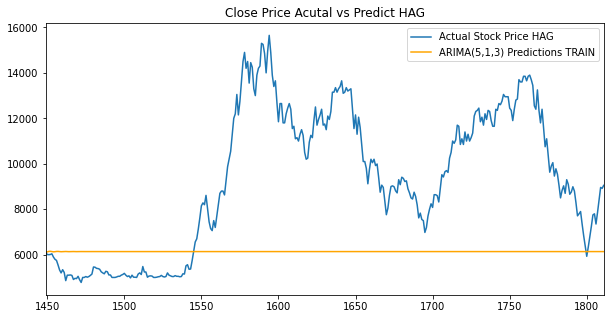

In [131]:
title = 'Close Price Acutal vs Predict HAG'
xlabel='' 
ax = test['price'].plot(figsize=(10,5),title=title,legend=True ,label='Actual Stock Price HAG')
# predictions.plot(legend=True)
pred_2['price'].plot(legend=True,color = 'orange',label='ARIMA(5,1,3) Predictions TRAIN')
ax.autoscale(axis='x',tight=True)

In [132]:
# #Train data
##lỗi trung bình bình phương RMSE(lỗi dự đoán) của tập test
#train model bằng tập train set
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(test['price'], pred_2['price'])
mape = mean_absolute_percentage_error(test['price'], pred_2['price'])
mse = mean_squared_error(test['price'], pred_2['price'])
rmse = np.sqrt(mse)
r2 = r2_score(test['price'], pred_2['price'])


print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 3636.61
MAPE: 34.39%
MSE: 19520525.36
RMSE: 4418.20
R2: -1.02
